# Data Preprocessing

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# reading excel file
df = pd.read_excel("Copper_Set.xlsx")

In [3]:
# top 5 rows
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
# bottom 5 rows
df.tail()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.0
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.0
181672,AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC,20200702.0,406.686538,30200854.0,25.0,Won,W,41.0,0.71,1240.0,0000000000000000000000000000000001005439,164141591,20200701.0,607.0


In [5]:
# the dataset contains  181673 rows and 14 columns 
df.shape

(181673, 14)

In [6]:
# features/columns in the dataset
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [7]:
# info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


## Checking for Missing Values

In [8]:
df.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [9]:
# In material_ref column, filling null values with placeholder "unknown" 
df.loc[:, "material_ref"] = df.loc[:, "material_ref"].fillna("unknown") 

In [10]:
# dropping those rows which have null values in the remaining columns as it is having less number of null values in their columns 
df.dropna(axis = 0, inplace = True)

In [11]:
# now, there is no missing values
df.isna().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [12]:
# the shape of the dataset after removing the missing values
df.shape

(181636, 14)

## Checking for Duplicates

In [13]:
# there is no duplicates in the dataset
df.duplicated().sum()

0

In [14]:
# No of unique values for each feature
for i in df.columns:
    print(i, "--->", df[i].nunique())

id ---> 181636
item_date ---> 252
quantity tons ---> 181636
customer ---> 1167
country ---> 17
status ---> 9
item type ---> 7
application ---> 30
thickness ---> 594
width ---> 1386
material_ref ---> 16564
product_ref ---> 33
delivery date ---> 28
selling_price ---> 9795


In [15]:
# unique values for each feature
df["id"].unique()

array(['EC06F063-9DF0-440C-8764-0B0C05A4F6AE',
       '4E5F4B3D-DDDF-499D-AFDE-A3227EC49425',
       'E140FF1B-2407-4C02-A0DD-780A093B1158', ...,
       '91643238-5C7B-4237-9A5F-63AE3D35F320',
       '7AFFD323-01D9-4E15-B80D-7D1B03498FC8',
       'AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC'], dtype=object)

In [16]:
df["item_date"].unique()

array([20210401., 19950000., 20210331., 20210330., 20210329., 20210328.,
       20210327., 20210326., 20210325., 20210324., 20210323., 20210322.,
       20210319., 20210318., 20210317., 20210316., 20210315., 20210314.,
       20210313., 20210312., 20210311., 20210310., 20210309., 20210308.,
       20210307., 20210306., 20210305., 20210304., 20210303., 20210302.,
       20210301., 20210228., 20210227., 20210226., 20210225., 20210224.,
       20210223., 20210222., 20210221., 20210220., 20210219., 20210218.,
       20210217., 20210216., 20210215., 20210214., 20210213., 20210212.,
       20210211., 20210210., 20210209., 20210208., 20210207., 20210205.,
       20210204., 20210203., 20210202., 20210201., 20210131., 20210130.,
       20210129., 20210128., 20210127., 20210126., 20210125., 20210124.,
       20210122., 20210121., 20210120., 20210119., 20210118., 20210117.,
       20210116., 20210115., 20210114., 20210113., 20210112., 20210111.,
       20210110., 20210109., 20210108., 20210107., 

In [17]:
df["quantity tons"].unique()

array([54.15113861692779, 768.0248392021871, 386.1279489091378, ...,
       4.2355935684967845, -2000, 406.68653838450405], dtype=object)

In [18]:
df["customer"].unique()

array([30156308., 30202938., 30153963., ..., 30349515., 30284694.,
       30161559.])

In [19]:
df["country"].unique()

array([ 28.,  25.,  30.,  32.,  38.,  78.,  27.,  77., 113.,  79.,  26.,
        39.,  40.,  84.,  80., 107.,  89.])

In [20]:
df["status"].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [21]:
df["item type"].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [22]:
df["application"].unique()

array([10., 41., 28., 59., 15.,  4., 38., 56., 42., 26., 27., 19., 20.,
       66., 29., 22., 40., 25., 67., 79.,  3., 99.,  2.,  5., 39., 69.,
       70., 65., 58., 68.])

In [23]:
df["thickness"].unique()

array([2.000e+00, 8.000e-01, 3.800e-01, 2.300e+00, 4.000e+00, 1.500e+00,
       6.800e-01, 6.000e-01, 5.500e-01, 7.500e-01, 3.700e-01, 5.950e-01,
       4.500e-01, 2.500e+00, 1.040e+00, 1.000e+00, 3.000e+00, 5.000e+00,
       5.000e-01, 2.500e+03, 1.100e+00, 7.200e-01, 1.250e+00, 1.800e+00,
       1.260e+00, 1.300e+00, 1.300e+01, 1.160e+00, 7.000e-01, 1.400e+00,
       9.000e-01, 6.350e+00, 2.400e+00, 7.000e+00, 1.000e+01, 1.900e+00,
       1.200e+01, 1.500e+01, 1.700e+00, 2.420e+00, 8.000e+00, 1.200e+00,
       1.920e+00, 3.200e-01, 1.750e+00, 1.600e+00, 1.150e+00, 3.200e+00,
       3.500e+00, 9.990e+00, 1.199e+01, 1.050e+00, 6.000e+00, 4.000e-01,
       5.700e-01, 4.700e-01, 2.250e+00, 2.750e+00, 1.800e-01, 8.500e-01,
       4.500e+00, 4.250e+00, 9.700e-01, 3.250e+00, 3.750e+00, 5.600e-01,
       2.900e+00, 3.800e+00, 2.200e+00, 2.600e+00, 3.700e+00, 6.300e-01,
       1.900e-01, 4.900e+00, 8.800e-01, 1.120e+00, 1.450e+00, 2.800e+00,
       1.060e+00, 1.860e+00, 3.300e+00, 3.510e+00, 

In [24]:
df["width"].unique()

array([1500., 1210.,  952., ..., 1831., 1741., 1786.])

In [25]:
df["material_ref"].unique()

array(['DEQ1 S460MC', '0000000000000000000000000000000000104991',
       'S0380700', ..., 'MAS65550', '4.11043_1060X5_BRE',
       '202006170005.IO.1.1'], dtype=object)

In [26]:
df["product_ref"].unique()

array([1670798778, 1668701718,     628377,     640665,     611993,
       1668701376,  164141591, 1671863738, 1332077137,     640405,
       1693867550, 1665572374, 1282007633, 1668701698,     628117,
       1690738206,     628112,     640400, 1671876026,  164336407,
        164337175, 1668701725, 1665572032,     611728, 1721130331,
       1693867563,     611733, 1690738219, 1722207579,  929423819,
       1665584320, 1665584662, 1665584642], dtype=int64)

In [27]:
df["delivery date"].unique()

array([20210701., 20210401., 20210101., 20210301., 20210601., 20210501.,
       20210801., 30310101., 20210901., 20211001., 20211101., 20220101.,
       20200701., 20201001., 20200101., 20210201., 20211201., 20190701.,
       20200801., 20201101., 20201201., 20190401., 20200601., 20200401.,
       20200901., 20200501., 20212222., 20191001.])

In [28]:
df["selling_price"].unique()

array([ 854.  , 1047.  ,  644.33, ...,  619.81,  628.52,  615.81])

## Feature Engineering

In [29]:
# creating three new features (item_date_year, item_date_month, item_date_day) from existing feature "item_date"
df["item_date_year"] = df["item_date"].astype(str).str[0:4]
df["item_date_month"] = df["item_date"].astype(str).str[4:6]
df["item_date_day"] = df["item_date"].astype(str).str[6:8]

In [30]:
# creating three new features (delivery_date_year, delivery_date_month, delivery_date_day) from existing feature "delivery date"
df["delivery_date_year"] = df["delivery date"].astype(str).str[0:4]
df["delivery_date_month"] = df["delivery date"].astype(str).str[4:6]
df["delivery_date_day"] = df["delivery date"].astype(str).str[6:8]

In [31]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date_year,item_date_month,item_date_day,delivery_date_year,delivery_date_month,delivery_date_day
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,2021,04,01,2021,07,01
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00,2021,04,01,2021,04,01
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,2021,04,01,2021,01,01
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00,2021,04,01,2021,01,01
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00,2021,04,01,2021,03,01


## Dealing with data types

In [32]:
df.dtypes

id                      object
item_date              float64
quantity tons           object
customer               float64
country                float64
status                  object
item type               object
application            float64
thickness              float64
width                  float64
material_ref            object
product_ref              int64
delivery date          float64
selling_price          float64
item_date_year          object
item_date_month         object
item_date_day           object
delivery_date_year      object
delivery_date_month     object
delivery_date_day       object
dtype: object

In [34]:
# when converting quantity tons feature in to float format, there is value error raising that 
# "ValueError: could not convert string to float: 'e'"
# df["quantity tons"].astype(float)

In [35]:
# there is one 'e' value in quantity tons feature which is causing the error
c = []
for i in df["quantity tons"].values:
    try:
        float(i)
    except:
        c.append(i)
print(c)

['e']


In [36]:
# getting the index number of 'e' value in quantity tons feature
df.loc[df.loc[:,"quantity tons"] == "e"].index

Index([173086], dtype='int64')

In [37]:
# dropping the row which is having 'e' value
df.drop(index = df.loc[df.loc[:,"quantity tons"] == "e"].index, axis = 0, inplace = True)

In [38]:
# now, doing data type conversion
df["quantity tons"] =  df["quantity tons"].astype(float)
df["item_date_year"] = df["item_date_year"].astype(int)
df["item_date_month"] = df["item_date_month"].astype(int)
df["item_date_day"] = df["item_date_day"].astype(int)
df["delivery_date_year"] = df["delivery_date_year"].astype(int)
df["delivery_date_month"] = df["delivery_date_month"].astype(int)
df["delivery_date_day"] = df["delivery_date_day"].astype(int)

In [39]:
df.dtypes

id                      object
item_date              float64
quantity tons          float64
customer               float64
country                float64
status                  object
item type               object
application            float64
thickness              float64
width                  float64
material_ref            object
product_ref              int64
delivery date          float64
selling_price          float64
item_date_year           int32
item_date_month          int32
item_date_day            int32
delivery_date_year       int32
delivery_date_month      int32
delivery_date_day        int32
dtype: object

## Correlation

In [40]:
columns = ["quantity tons", "customer", "country", "application", "thickness", "width", "product_ref", "selling_price", "item_date_year", 
           "item_date_month", "item_date_day", "delivery_date_year", "delivery_date_month", "delivery_date_day"]
corr = df.loc[:, columns].corr()
corr

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,item_date_year,item_date_month,item_date_day,delivery_date_year,delivery_date_month,delivery_date_day
quantity tons,1.000000,-0.000659,-0.001530,-0.001956,-0.000640,-0.000428,-0.001086,-0.000010,-0.001954,0.000173,-0.000312,-0.000693,0.002947,-0.000006
customer,-0.000659,1.000000,0.083568,0.000900,0.038759,0.050528,-0.032340,0.001747,0.004106,-0.007429,0.008662,0.003166,-0.012061,0.002755
country,-0.001530,0.083568,1.000000,-0.019358,-0.019579,0.055286,-0.147388,0.002993,-0.016365,0.022811,-0.058940,-0.015559,0.022659,-0.001624
application,-0.001956,0.000900,-0.019358,1.000000,-0.059479,-0.204446,-0.131832,0.001462,-0.016391,0.020186,-0.009044,-0.013758,0.018252,0.005866
thickness,-0.000640,0.038759,-0.019579,-0.059479,1.000000,0.161643,0.038149,-0.001129,0.003249,-0.003900,-0.006718,0.001691,-0.005040,-0.000701
width,-0.000428,0.050528,0.055286,-0.204446,0.161643,1.000000,-0.034418,0.000584,0.021089,-0.025581,0.000559,0.001481,0.015141,-0.000406
product_ref,-0.001086,-0.032340,-0.147388,-0.131832,0.038149,-0.034418,1.000000,0.002117,0.036633,-0.025150,0.004555,0.013806,-0.030269,-0.001548
selling_price,-0.000010,0.001747,0.002993,0.001462,-0.001129,0.000584,0.002117,1.000000,0.004439,-0.003791,0.001281,0.000492,-0.002745,-0.000008
item_date_year,-0.001954,0.004106,-0.016365,-0.016391,0.003249,0.021089,0.036633,0.004439,1.000000,-0.924081,-0.000454,0.109206,-0.102216,-0.001863
item_date_month,0.000173,-0.007429,0.022811,0.020186,-0.003900,-0.025581,-0.025150,-0.003791,-0.924081,1.000000,-0.055394,-0.060122,-0.070818,0.002536


<Axes: >

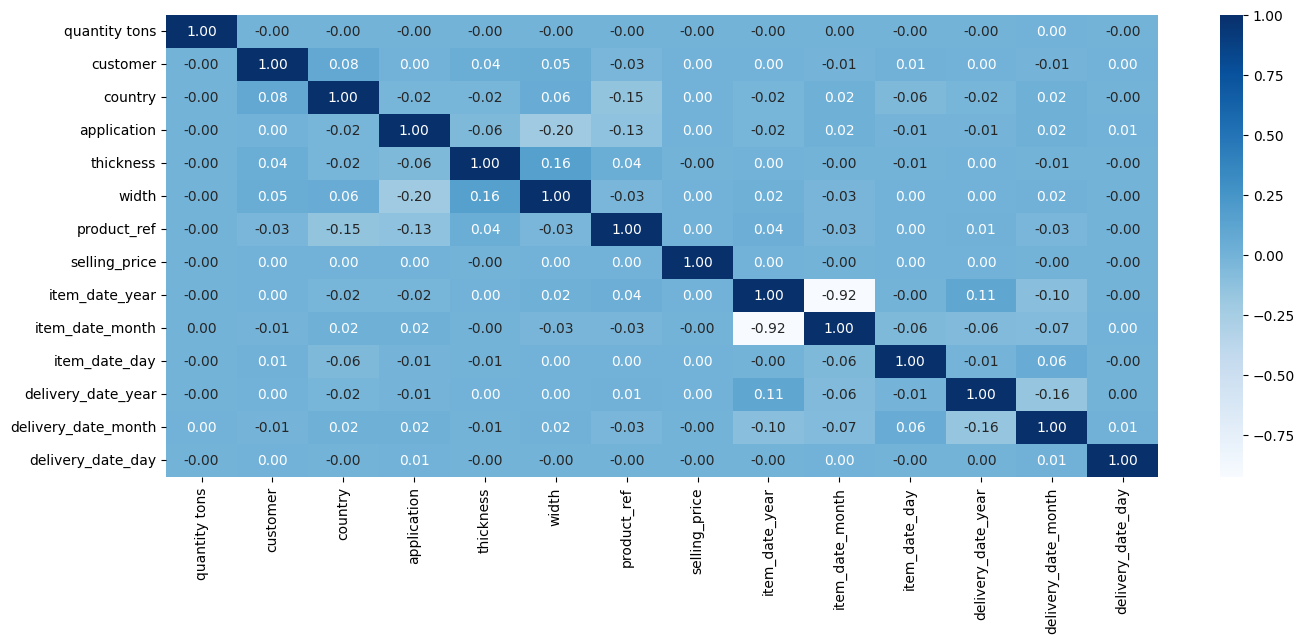

In [41]:
plt.figure(figsize = (16, 6))
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = "Blues")

## Checking for negative values in Numerical Features

In [42]:
columns = ["quantity tons", "customer", "country", "application", "thickness", "width", "product_ref", "selling_price", "item_date_year", 
           "item_date_month", "item_date_day", "delivery_date_year", "delivery_date_month", "delivery_date_day"]
for  i in columns:
    print(i, "--->", df[df[i] <= 0].shape[0])

quantity tons ---> 4
customer ---> 0
country ---> 0
application ---> 0
thickness ---> 0
width ---> 0
product_ref ---> 0
selling_price ---> 7
item_date_year ---> 0
item_date_month ---> 1
item_date_day ---> 1
delivery_date_year ---> 0
delivery_date_month ---> 0
delivery_date_day ---> 0


In [43]:
# dropping those rows which are having negative values in numerical features
df.drop(index = df.loc[df.loc[:,"quantity tons"] <= 0].index, axis = 0, inplace = True)
df.drop(index = df.loc[df.loc[:,"selling_price"] <= 0].index, axis = 0, inplace = True)
df.drop(index = df.loc[df.loc[:,"item_date_month"] <= 0].index, axis = 0, inplace = True)
df.drop(index = df.loc[df.loc[:,"item_date_day"] <= 0].index, axis = 0, inplace = True)

In [44]:
#  checking for values which are wrongly entered in the item_date(year, month, day) and similarly for delivery date(year, month, day)   
print("1.-->", df["item_date_year"][df["item_date_year"] > 2023].values)
print("2.-->", df["item_date_month"][df["item_date_month"] > 12].values)
print("3.-->", df["item_date_day"][df["item_date_day"] > 31].values)
print("4.-->", df["delivery_date_year"][df["delivery_date_year"] > 2023].values)
print("5.-->", df["delivery_date_month"][df["delivery_date_month"] > 12].values)
print("6.-->", df["delivery_date_day"][df["delivery_date_day"] > 31].values)

1.--> []
2.--> [19]
3.--> []
4.--> [3031]
5.--> [22]
6.--> []


In [45]:
# so, dropping those rows 
df.drop(index = df.loc[:, "item_date_month"][df.loc[:, "item_date_month"] > 12].index, axis = 0, inplace = True)
df.drop(index = df.loc[:, "delivery_date_year"][df.loc[:, "delivery_date_year"] > 2023].index, axis = 0, inplace = True)
df.drop(index = df.loc[:, "delivery_date_month"][df.loc[:, "delivery_date_month"] > 12].index, axis = 0, inplace = True)

In [46]:
df.shape

(181620, 20)

## Checking for Skewness

<Figure size 1600x600 with 0 Axes>

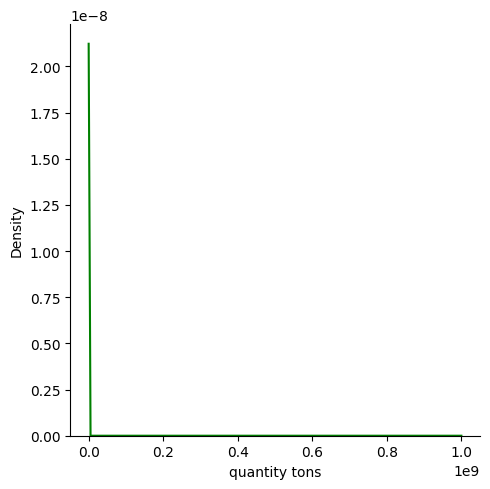

<Figure size 1600x600 with 0 Axes>

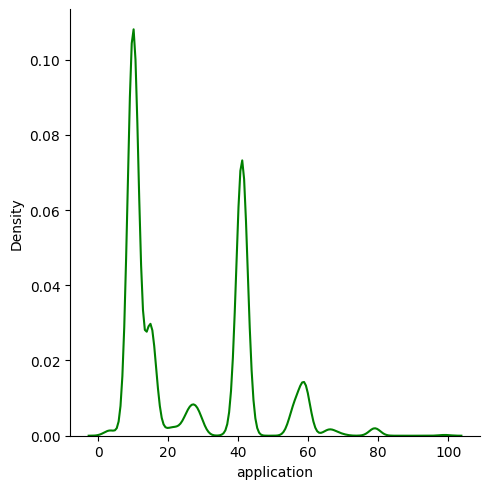

<Figure size 1600x600 with 0 Axes>

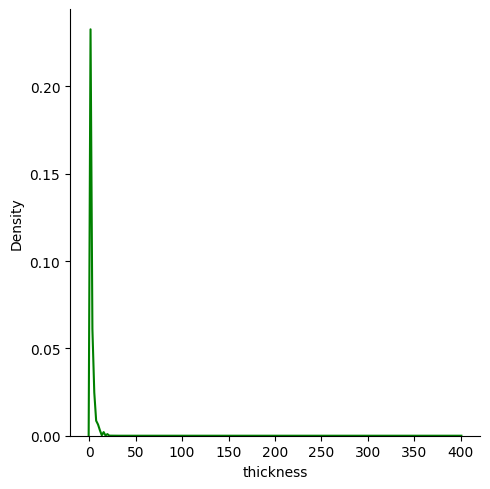

<Figure size 1600x600 with 0 Axes>

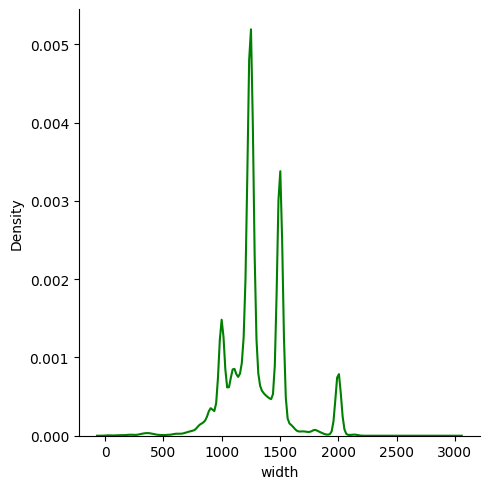

<Figure size 1600x600 with 0 Axes>

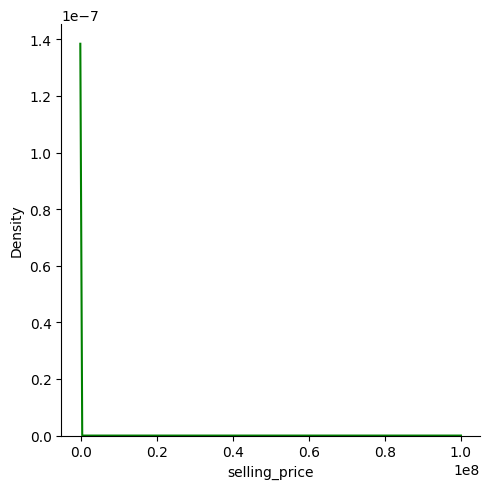

In [47]:
# with skewness
col = ["quantity tons", "application", "thickness", "width", "selling_price"]
for i in col:
    plt.figure(figsize = (16, 6))
    sns.displot(df[i], kind = "kde", color = "g")
    plt.show()

<Figure size 1600x600 with 0 Axes>

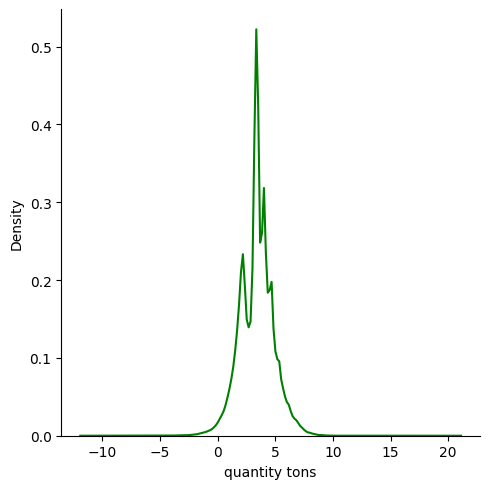

<Figure size 1600x600 with 0 Axes>

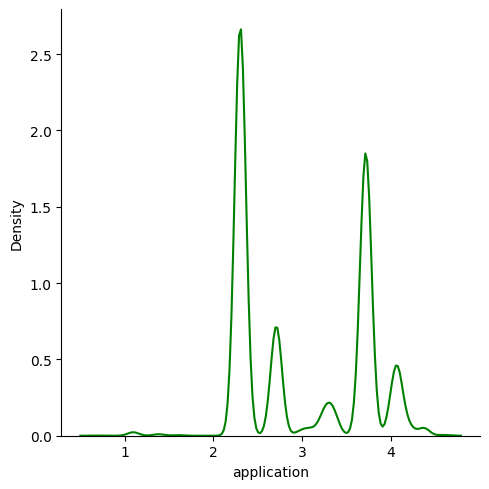

<Figure size 1600x600 with 0 Axes>

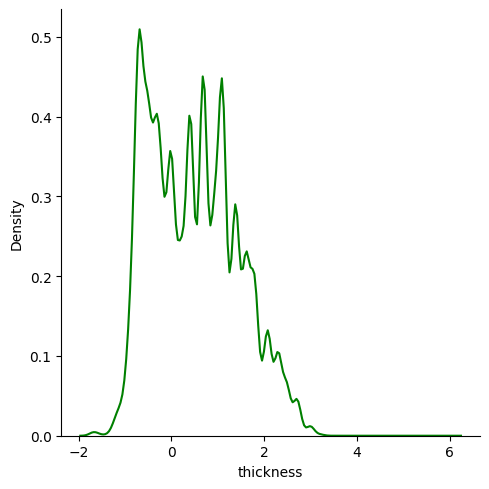

<Figure size 1600x600 with 0 Axes>

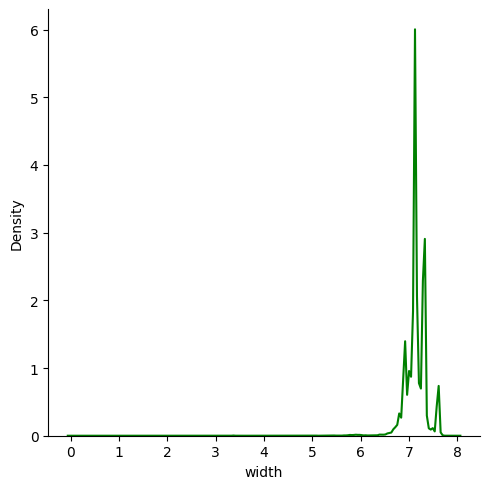

<Figure size 1600x600 with 0 Axes>

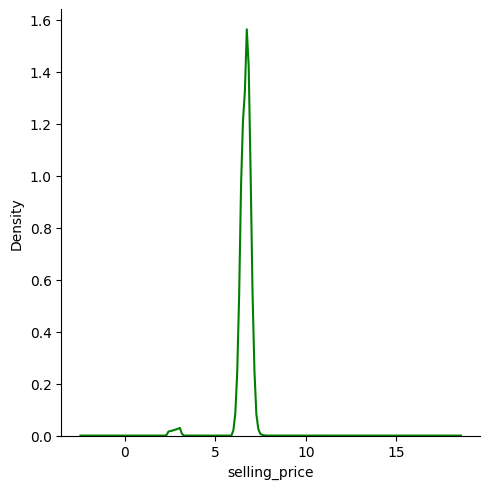

In [48]:
# using log transformation to remove skewness
col = ["quantity tons", "application", "thickness", "width", "selling_price"]
for i in col:
    plt.figure(figsize = (16, 6))
    df[i] = np.log(df[i])
    sns.displot(df[i], kind = "kde", color = "g")
    plt.show()

In [49]:
df.reset_index(drop = True, inplace = True)

In [50]:
df.to_csv("cleaned_copper_dataset.csv", index =False, encoding = "utf-8-sig")